In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('customers2.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = data.iloc[:, [3, 4]].values  # 全部行，第四第五列  Annual Income (k$) 和 Spending Score (1-100)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  # k=5 
y_kmeans = kmeans.fit_predict(X)
# K-means与K-means++：2
# 原始K-means算法最开始随机选取数据集中K个点作为聚类中心，
# 而K-means++按照如下的思想选取K个聚类中心：
# 假设已经选取了n个初始聚类中心(0<n<K)，则在选取第n+1个聚类中心时：距离当前n个聚类中心越远的点会有更高的概率被选为第n+1个聚类中心。
# 在选取第一个聚类中心(n=1)时同样通过随机的方法

In [8]:
# 画图显示
  plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
  plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Traditional')
  plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Normal')
  plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Youth')
  plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'TA')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
  plt.title('Clusters of customers')
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.legend()
  plt.show()

IndentationError: unexpected indent (<ipython-input-8-f619945d3bed>, line 2)

In [12]:
  import matplotlib.pyplot as plt
  wcss = []
  for i in range(1, 11): #循环使用不同k测试结果
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_) #inertia簇内误差平方和


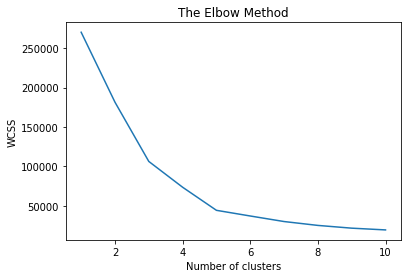

In [13]:
  plt.plot(range(1, 11), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [ ]:
# 显示五个分群最好


In [7]:
# 聚类的分析案例
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ageinc = pd.read_csv('ageinc.csv')
ageinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
income    1000 non-null int64
age       1000 non-null int64
dtypes: int64(2)
memory usage: 15.7 KB


In [8]:
# 基本数据
ageinc.describe()

,income,age
count,1000.00000,1000.000000
mean,80116.81800,39.410000
std,39262.33567,10.976811
min,0.00000,18.000000
25%,46402.25000,30.000000
50%,78993.50000,39.000000
75%,114810.50000,49.000000
max,179294.00000,63.000000


In [9]:
# 收入-收入均值  /  收入标准差
ageinc['z_income'] = (ageinc['income']- ageinc['income'].mean())/ageinc['income'].std()
# 年龄-年龄均值   / 年龄标准差
ageinc['z_age'] = (ageinc['age']-ageinc['age'].mean())/ageinc['age'].std()
ageinc.describe()

,income,age,z_income,z_age
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03
mean,80116.81800,39.410000,2.842171e-17,2.906009e-16
std,39262.33567,10.976811,1.000000e+00,1.000000e+00
min,0.00000,18.000000,-2.040552e+00,-1.950475e+00
25%,46402.25000,30.000000,-8.587000e-01,-8.572617e-01
50%,78993.50000,39.000000,-2.861058e-02,-3.735147e-02
75%,114810.50000,49.000000,8.836378e-01,8.736599e-01
max,179294.00000,63.000000,2.526013e+00,2.149076e+00


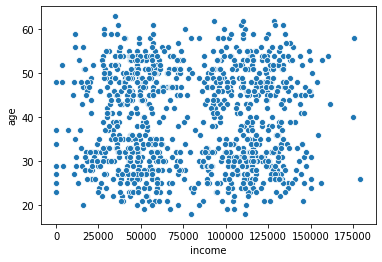

In [11]:
sns.scatterplot(x='income',y='age',data=ageinc)

In [15]:
# 现在开始进行聚类分析
from sklearn import  cluster
model = cluster.KMeans(n_clusters=4,random_state=10)
model.fit(ageinc[['z_income','z_age']])

# 给用户打上标签

ageinc['cluster'] = model.labels_

ageinc.head(50)



,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,1
2,36517,52,-1.110474,1.146963,2
3,33223,49,-1.194372,0.873660,2
4,72994,53,-0.181416,1.238064,2
5,38361,26,-1.063508,-1.221666,1
6,48579,29,-0.803259,-0.948363,1
7,115248,24,0.894781,-1.403869,3
8,11527,31,-1.746962,-0.766161,1
9,54096,51,-0.662742,1.055862,2


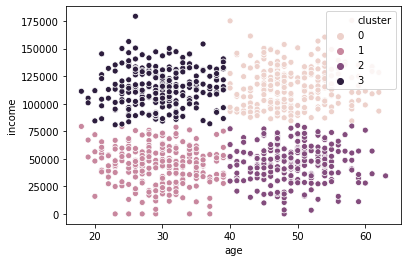

In [16]:
# 可视化结果
sns.scatterplot(x='age',y='income',hue='cluster',data=ageinc)
#横轴为年龄，纵轴为收入，分类为用户分群标签

In [18]:
ageinc.groupby(['cluster'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,238.0,116199.844538,18110.799585,84364.0,100752.25,115183.0,127515.25,175497.0
1,248.0,43699.213710,17463.882999,0.0,31967.50,45212.5,56248.00,79360.0
2,256.0,46482.371094,16357.141893,0.0,35781.75,47520.0,57161.75,80243.0
3,258.0,115210.709302,16802.768499,80820.0,104076.00,114943.5,127979.25,179294.0


In [19]:
# 年龄
ageinc.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,238.0,49.399160,5.142312,40.0,46.0,48.0,53.0,62.0
1,248.0,29.625000,4.857535,18.0,26.0,30.0,33.0,39.0
2,256.0,49.339844,4.784548,40.0,46.0,49.0,53.0,63.0
3,258.0,29.748062,4.674887,18.0,26.0,30.0,33.0,39.0


In [ ]:
# 这么一下就看出来了   一共四个快快  就是同意阶段年级 不同薪资  相同薪资  年龄不同

In [ ]:
# Airbnb的客户分层

# 分析用户群体的核心特征
# 数据概括分析 》》》 单变量分析  》》》 聚类分析

In [24]:
import  pandas as pd
airbnb = pd.read_csv('airbnb.csv')

airbnb.info()
airbnb.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67936 entries, 0 to 67935
Data columns (total 14 columns):
age                     67936 non-null int64
date_account_created    67936 non-null object
date_first_booking      67936 non-null object
gender                  67936 non-null object
Language_EN             67936 non-null int64
Language_ZH             67936 non-null int64
Country_US              67936 non-null int64
Country_EUR             67936 non-null int64
android                 67936 non-null int64
moweb                   67936 non-null int64
web                     67936 non-null int64
ios                     67936 non-null int64
Married                 67936 non-null int64
Children                67936 non-null int64
dtypes: int64(11), object(3)
memory usage: 7.3+ MB


,age,date_account_created,date_first_booking,gender,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
0,56,9/28/2010,8/2/2010,F,1,0,1,0,1,0,1,0,1,1
1,42,12/5/2011,9/8/2012,F,1,0,0,0,0,1,1,0,0,1
2,41,9/14/2010,2/18/2010,U,1,0,1,0,1,0,1,0,0,2
3,46,1/2/2010,1/5/2010,F,1,0,1,0,1,0,1,0,0,2
4,47,1/3/2010,1/13/2010,F,1,0,1,0,1,0,1,0,1,3


In [23]:
airbnb.describe()

,age,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
count,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000
mean,47.874249,0.974476,0.005947,0.713907,0.159091,0.658355,0.340423,0.895828,0.067534,0.790155,1.536696
std,146.090906,0.157711,0.076886,0.451937,0.365764,0.474265,0.473855,0.305485,0.250947,0.407201,0.836273
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,42.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
# 发现有异常值  进行数据的清理
# 把有问题的值进行清理
airbnb = airbnb[airbnb['age']<=70]
airbnb = airbnb[airbnb['age']>=18]
airbnb.age.describe()


count    65982.000000
mean        35.758449
std         10.501463
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         70.000000
Name: age, dtype: float64

In [27]:
#将注册日期转变为日期时间格式
airbnb['date_account_created']=pd.to_datetime(airbnb['date_account_created'])
airbnb.info()
#data_account_created变量格式从object转变为datetime64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65982 entries, 0 to 67935
Data columns (total 14 columns):
age                     65982 non-null int64
date_account_created    65982 non-null datetime64[ns]
date_first_booking      65982 non-null object
gender                  65982 non-null object
Language_EN             65982 non-null int64
Language_ZH             65982 non-null int64
Country_US              65982 non-null int64
Country_EUR             65982 non-null int64
android                 65982 non-null int64
moweb                   65982 non-null int64
web                     65982 non-null int64
ios                     65982 non-null int64
Married                 65982 non-null int64
Children                65982 non-null int64
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 7.6+ MB


In [29]:

# 年份取出来 将会2019- 注册日期的年份生成一个新的变量
# 计算注册至今多少年了
airbnb['year_since_account_created'] = airbnb['date_account_created'].apply(lambda x: 2019-x.year)
airbnb.year_since_account_created.describe()
# 最大的九年  少的五年

count    65982.000000
mean         6.035282
std          0.965382
min          5.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: year_since_account_created, dtype: float64

In [30]:
# 计算用户第一次预定到2019年的时间
airbnb['date_first_booking'] = pd.to_datetime(airbnb['date_first_booking'])
airbnb['year_since_first_booking'] = airbnb['date_first_booking'].apply(lambda x:2019-x.year)

airbnb.year_since_first_booking.describe()
# 最长时间九年  最小的四年  看min和max

count    65982.000000
mean         5.906641
std          0.995412
min          4.000000
25%          5.000000
50%          6.000000
75%          6.000000
max          9.000000
Name: year_since_first_booking, dtype: float64

In [31]:
# 转换变量  哑巴变量
airbnb = pd.get_dummies(airbnb)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65982 entries, 0 to 67935
Data columns (total 18 columns):
age                           65982 non-null int64
date_account_created          65982 non-null datetime64[ns]
date_first_booking            65982 non-null datetime64[ns]
Language_EN                   65982 non-null int64
Language_ZH                   65982 non-null int64
Country_US                    65982 non-null int64
Country_EUR                   65982 non-null int64
android                       65982 non-null int64
moweb                         65982 non-null int64
web                           65982 non-null int64
ios                           65982 non-null int64
Married                       65982 non-null int64
Children                      65982 non-null int64
year_since_account_created    65982 non-null int64
year_since_first_booking      65982 non-null int64
gender_F                      65982 non-null uint8
gender_M                      65982 non-null uint8
gender

In [33]:
# 删除两个日期的变量  恶意根据数据格式来进行drop
airbnb.drop(airbnb.select_dtypes(['datetime64']),inplace=True,axis=1)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65982 entries, 0 to 67935
Data columns (total 16 columns):
age                           65982 non-null int64
Language_EN                   65982 non-null int64
Language_ZH                   65982 non-null int64
Country_US                    65982 non-null int64
Country_EUR                   65982 non-null int64
android                       65982 non-null int64
moweb                         65982 non-null int64
web                           65982 non-null int64
ios                           65982 non-null int64
Married                       65982 non-null int64
Children                      65982 non-null int64
year_since_account_created    65982 non-null int64
year_since_first_booking      65982 non-null int64
gender_F                      65982 non-null uint8
gender_M                      65982 non-null uint8
gender_U                      65982 non-null uint8
dtypes: int64(13), uint8(3)
memory usage: 7.2 MB


In [34]:
# 五个变量是分群的维度
airbnb_5 = airbnb[['age','web','moweb','ios','android']]
# 数据标准化  处理scale
from sklearn.preprocessing import scale
x = pd.DataFrame(scale(airbnb_5))
# 建模
from sklearn import cluster
# 分成三类
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)
# 提取标签
# 查看结果
airbnb_5['cluster'] = model.labels_
airbnb_5.head(10)


C:\Users\cy176\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,age,web,moweb,ios,android,cluster
0,56,1,0,0,1,1
1,42,1,1,0,0,0
2,41,1,0,0,1,1
3,46,1,0,0,1,1
4,47,1,0,0,1,1
5,50,1,0,0,1,1
6,46,1,0,0,1,1
7,36,1,0,0,1,1
8,33,1,0,0,1,1
9,31,1,0,0,1,1


In [35]:
# 使用grouby函数进行分组  评估各个变量维度的分群效果
airbnb_5.groupby(['cluster'])['age'].describe()


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,20984.0,34.866517,9.576614,18.0,28.0,33.0,39.0,70.0
1,40473.0,36.531638,11.063559,18.0,29.0,34.0,42.0,70.0
2,4525.0,32.979006,8.440972,18.0,27.0,31.0,37.0,70.0


In [36]:
airbnb_5.groupby(['cluster'])['ios'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,20984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40473.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4525.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [37]:
from sklearn import metrics#调用sklearn的metrics库
x_cluster=model.fit_predict(x)#个体与群的距离
score=metrics.silhouette_score(x,x_cluster)#评分越高，个体与群越近；评分越低，个体与群越远
print(score)

0.6304549142727747


In [39]:
centers=pd.DataFrame(model.cluster_centers_)
centers.to_csv('center_3.csv')
#将群体分为5组
model=cluster.KMeans(n_clusters=5,random_state=10)
model.fit(x)
centers=pd.DataFrame(model.cluster_centers_)
centers.to_csv('center_5.csv')